**Actividad 03: Regresión**

1. **Juan Manuel Mejia Taborda**
2.   **Yubar Daniel Marín Benjumea**
1.   **Jaime Alberto Henao Acevedo**
2. **Mario Varas González**




La regresión lineal es un algoritmo para aprendizaje automático, puede ser entrenado de diferentes maneras. En esta actividad desarrollamos los siguientes algoritmos lineales:

*   Regresion Lineal Clasica
*   Elastic Net
*   Bosque Aleatorios
*   XGBoost
*   Maquina de Soporte Vectorial
*   Redes neuronales










 


**Planteamiento del problema**


Mediante la aplicacion del algoritmo de regresion lineal evaluaremos cual modelo de prediccion muestra el mejor comportamiento e impacto de las variables sobre el precio de las viviendas que es una variable continua.   


**Definiciones**

**Linear Assumption (Suposición lineal)**: La regresión lineal asume que la relación entre la entrada y la salida es lineal. No admite nada más. Cuando se tienen muchos atributos, es posible que tenga que transformar los datos para que la relación sea lineal.

**Remove Noise (Elimine el ruido)**: La regresión lineal asume que las variables de entrada y salida no tienen ruido. Considere la posibilidad de utilizar operaciones de limpieza de datos que le permitan exponer y aclarar mejor la señal en sus datos. Esto es más importante para la variable de salida y usted quiere eliminar los valores atípicos en la variable de salida (y) si es posible.

**Remove Collinearity (Eliminar colinealidad)**: La regresión lineal se ajustará en exceso a sus datos cuando tenga variables de entrada altamente correlacionadas. Considere la posibilidad de calcular las correlaciones por pares de sus datos de entrada y eliminar las más correlacionadas.

**Gaussian Distributions**: La regresión lineal hará predicciones más fiables si sus variables de entrada y salida tienen una distribución gaussiana. 

**Rescale Inputs** (Reescalar las entradas): La regresión lineal suele hacer predicciones más fiables si se reescalan las variables de entrada utilizando la estandarización o la normalización.

**MAE** El error absoluto medio, es la media del valor absoluto de los errores
 
**MSE** El error cuadrático medio, es la media de los errores al cuadrado

**RMSE** El error cuadrático medio, es la raíz cuadrada de la media de los errores al cuadrado


**Importar Librerias**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

**Carga de Datos**

In [64]:
dataset = pd.read_csv(
    'dataset_taiwan.csv',
    delimiter=',',
    header=None,
    skiprows=[0],
    names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
)
dataset.head()

,X1,X2,X3,X4,X5,X6,Y
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [65]:
dataset.shape

(414, 7)

In [66]:
dataset['X1'] = dataset['X1'].apply(lambda x: str(x)[:4])

#### Análisis descriptivo

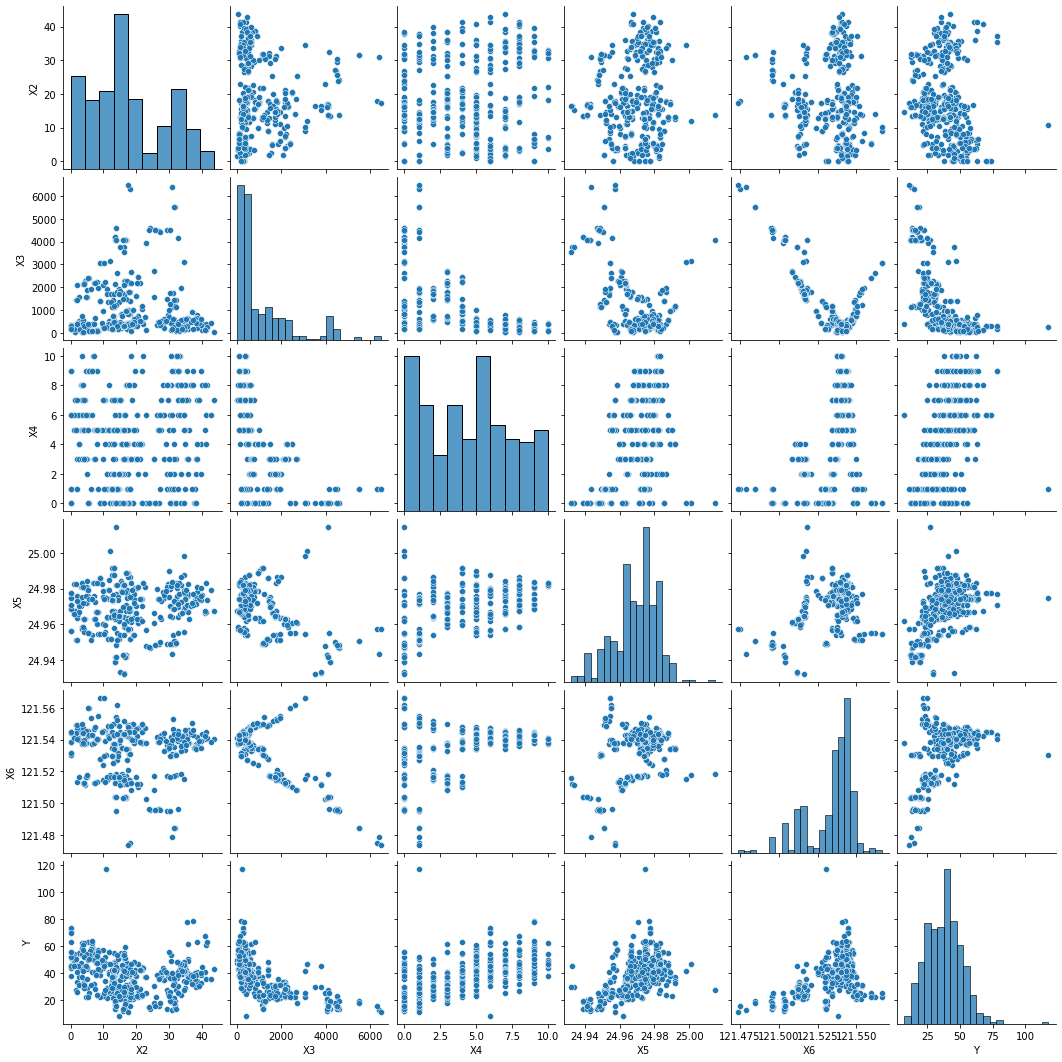

In [67]:
sns.pairplot(dataset)
plt.show()

Se construye el gráfico de pares con el propósito de analizar las relación de cada variable $x_i$ con la $y$ a predecir. Los resultados fueron los siguientes:


* $x_2$ vs $y$: Se puede observa una relación cuadrática entre estas dos variables.

* $x_3$ vs $y$: Se puede observar una relación decreciente entre las dos variables.

* $x_4$ vs $y$: Se puede observar una relación lineal positiva entre  las dos variables.

* $x_5$ vs $y$: Se puede observar una relación lineal positiva entre  las dos variables. Además de pude ver que a medida que el calor de $x_5$ aumenta, también se aprecia un incremento en la varianza de la relación.

* $x_6$ vs $y$: Se puede observar una relación lineal positiva entre  las dos variables. Además pude ver que a medida que el calor de $x_6$ aumenta, también se aprecia un incremento en la varianza de la relación.




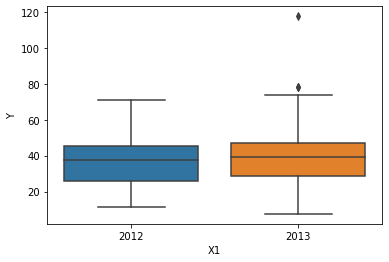

In [68]:
sns.boxplot(x="X1", y="Y", data=dataset)
plt.show()

La variable $x_1$ fecha de la transacción en este caso la evaluamos como una variable categórica y en dimensión de año. Al construir un diagrama de caja y bigote podemos concluir que como las cajas para los años 2012 y 2013 se traslapan no existe una diferencia en medias entre las dos categorías, lo que nos permite inferir que esta variable no aporta mucha información significativa al modelo. Por otro lado, se pueden apreciar en el año 2013 dos casas que presentan valores atípicos.

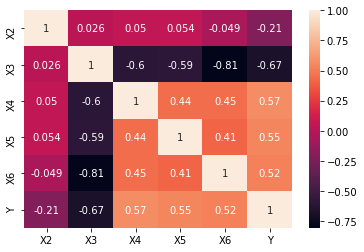

In [69]:
matriz_correlacion = dataset.corr()
sns.heatmap(matriz_correlacion, annot = True)
plt.show()

Analizando la matriz de correlación podemos concluir que las variables $x_4$,$x_3$, $x_5$ y $x_6$ presentan una correlación moderada con la variable de respuesta, donde $x_3$ presentan la correlación más alta. La correlación entre $x_2$ y $y$ es la más baja debido a que la relación entre dos variables es cuadrática y no lineal.

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    object 
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 45.9+ KB


**Entrenamiento del Modelo de Regresion Lineal**

In [71]:
X = dataset[['X2', 'X3', 'X4', 'X5', 'X6']]
y = dataset['Y']

**Test de Prueba**

In [72]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)

    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('_____________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)

    return mae, mse, rmse, r2_square

**Preparacion de Datos para la Regresion Lineal**

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

**Regresion Lineal Clasica**

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [76]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
X2,-2.752591
X3,-6.097014
X4,3.239851
X5,3.151372
X6,-0.709797


Feature: X2, Score: -2.75259
Feature: X3, Score: -6.09701
Feature: X4, Score: 3.23985
Feature: X5, Score: 3.15137
Feature: X6, Score: -0.70980


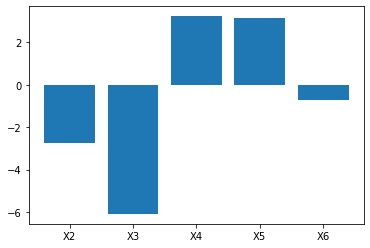

In [77]:
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: X%0d, Score: %.5f' % (i+2,v))
# plot feature importance
plt.bar(['X'+str(x+2) for x in range(len(importance))], importance)
plt.show()

**Predicciones del Modelo**

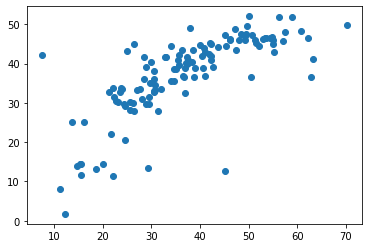

In [78]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

**Evaluacion de Metricas**

In [79]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 6.151521273181796
MSE: 74.0592630314788
RMSE: 8.605769171403496
R2 Square 0.5571283505007744
_____________________
Train set evaluation:
MAE: 6.23022050404604
MSE: 81.94539155532883
RMSE: 9.052369389023452
R2 Square 0.5721696248503592
_____________________


In [80]:
results_df = pd.DataFrame(
    data=[[
        'Linear Regression',
        *evaluate(y_test, test_pred),
        cross_val(LinearRegression())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316


**Regresion Lineal (ElasticNet)**

In [81]:
from sklearn.linear_model import ElasticNet


model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 6.1435310365095255
MSE: 73.3259726333712
RMSE: 8.563058602705647
R2 Square 0.5615133999176695
_____________________
Train set evaluation:
MAE: 6.256323514664178
MSE: 82.11930154303349
RMSE: 9.061970069639024
R2 Square 0.5712616546293405
_____________________


Feature: X2, Score: -2.62049
Feature: X3, Score: -5.44709
Feature: X4, Score: 3.21620
Feature: X5, Score: 3.13457
Feature: X6, Score: -0.05872


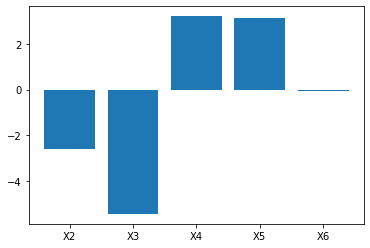

In [82]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: X%0d, Score: %.5f' % (i+2,v))
# plot feature importance
plt.bar(['X'+str(x+2) for x in range(len(importance))], importance)
plt.show()

In [83]:
results_df_2 = pd.DataFrame(
    data=[[
      'Lineal Regresson (ElasticNet)',
      *evaluate(y_test, test_pred),
      cross_val(ElasticNet())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df = results_df.append(results_df_2, ignore_index=True)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316
1,Lineal Regresson (ElasticNet),6.143531,73.325973,8.563059,0.561513,0.546356


**Predicciones del Modelo**

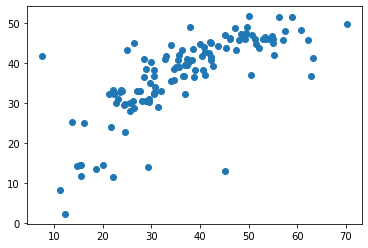

In [84]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

**Bosques Aleatorios**

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, utils


lab_enc = preprocessing.LabelEncoder()

model = RandomForestClassifier()
model.fit(X_train, lab_enc.fit_transform(y_train))

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 59.58319999999999
MSE: 5561.639120000001
RMSE: 74.57639787493092
R2 Square -32.258395913916765
_____________________
Train set evaluation:
MAE: 64.91937716262976
MSE: 6061.652076124567
RMSE: 77.85661228260942
R2 Square -30.647403624936725
_____________________


Feature: X2, Score: 0.34259
Feature: X3, Score: 0.18829
Feature: X4, Score: 0.09129
Feature: X5, Score: 0.19606
Feature: X6, Score: 0.18177


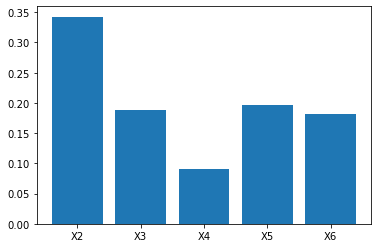

In [86]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: X%0d, Score: %.5f' % (i+2,v))
# plot feature importance
plt.bar(['X'+str(x+2) for x in range(len(importance))], importance)
plt.show()

In [87]:
results_df_2 = pd.DataFrame(
    data=[[
      'Random Forest',
      *evaluate(y_test, test_pred),
      cross_val(ElasticNet())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df = results_df.append(results_df_2, ignore_index=True)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316
1,Lineal Regresson (ElasticNet),6.143531,73.325973,8.563059,0.561513,0.546356
2,Random Forest,59.583200,5561.639120,74.576398,-32.258396,0.546356


**Predicciones del Modelo**

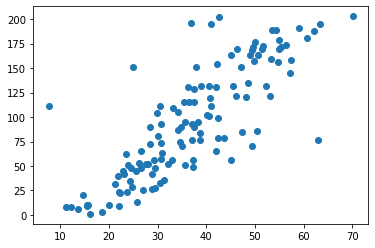

In [88]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

## XGBoost

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing, utils


lab_enc = preprocessing.LabelEncoder()

model = GradientBoostingClassifier()
model.fit(X_train, lab_enc.fit_transform(y_train))

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 63.2104
MSE: 6328.23912
RMSE: 79.5502301693716
R2 Square -36.84263551621742
_____________________
Train set evaluation:
MAE: 63.12352941176471
MSE: 5814.08044982699
RMSE: 76.2501177036927
R2 Square -29.354851844477125
_____________________


Feature: X2, Score: 0.51641
Feature: X3, Score: 0.05790
Feature: X4, Score: 0.02038
Feature: X5, Score: 0.36848
Feature: X6, Score: 0.03683


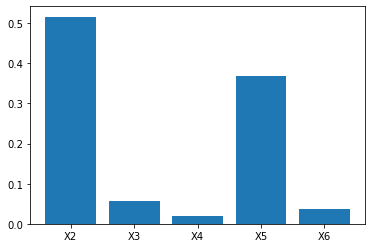

In [90]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: X%0d, Score: %.5f' % (i+2,v))
# plot feature importance
plt.bar(['X'+str(x+2) for x in range(len(importance))], importance)
plt.show()

In [91]:
results_df_2 = pd.DataFrame(
    data=[[
      'XGBoost',
      *evaluate(y_test, test_pred),
      cross_val(ElasticNet())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df = results_df.append(results_df_2, ignore_index=True)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316
1,Lineal Regresson (ElasticNet),6.143531,73.325973,8.563059,0.561513,0.546356
2,Random Forest,59.583200,5561.639120,74.576398,-32.258396,0.546356
3,XGBoost,63.210400,6328.239120,79.550230,-36.842636,0.546356


**Predicciones del Modelo**

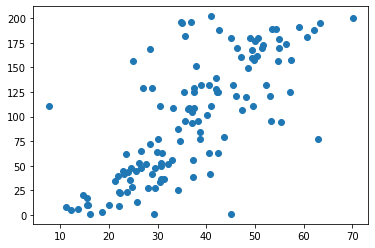

In [92]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

**Maquina de Soporte Vectorial**

In [93]:
from sklearn.svm import SVC
from sklearn import preprocessing, utils


lab_enc = preprocessing.LabelEncoder()

model = SVC()
model.fit(X_train, lab_enc.fit_transform(y_train))

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 53.4888
MSE: 3761.6183200000005
RMSE: 61.332033392021174
R2 Square -21.494338209344736
_____________________
Train set evaluation:
MAE: 58.01764705882353
MSE: 4517.541349480969
RMSE: 67.21265765821917
R2 Square -22.585724268551296
_____________________


In [94]:
results_df_2 = pd.DataFrame(
    data=[[
      'MSV',
      *evaluate(y_test, test_pred),
      cross_val(ElasticNet())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df = results_df.append(results_df_2, ignore_index=True)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316
1,Lineal Regresson (ElasticNet),6.143531,73.325973,8.563059,0.561513,0.546356
2,Random Forest,59.583200,5561.639120,74.576398,-32.258396,0.546356
3,XGBoost,63.210400,6328.239120,79.550230,-36.842636,0.546356
4,MSV,53.488800,3761.618320,61.332033,-21.494338,0.546356


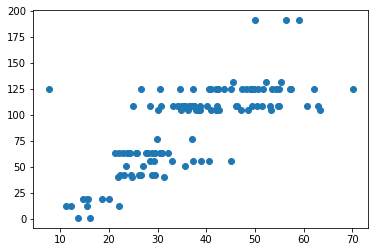

In [95]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

**Red Neuronal**

In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing, utils

lab_enc = preprocessing.LabelEncoder()

model = SVC()
model.fit(X_train, lab_enc.fit_transform(y_train))

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 53.4888
MSE: 3761.6183200000005
RMSE: 61.332033392021174
R2 Square -21.494338209344736
_____________________
Train set evaluation:
MAE: 58.01764705882353
MSE: 4517.541349480969
RMSE: 67.21265765821917
R2 Square -22.585724268551296
_____________________


**Predicciones del Modelo**

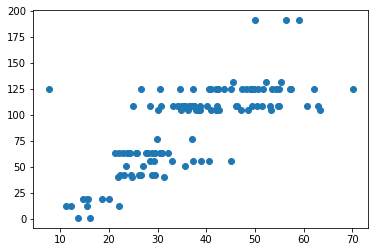

In [99]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

#### Resultados

In [97]:
results_df_2 = pd.DataFrame(
    data=[[
      'Red Neuronal',
      *evaluate(y_test, test_pred),
      cross_val(ElasticNet())
    ]],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']
)
results_df = results_df.append(results_df_2, ignore_index=True)
results_df.drop_duplicates()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.151521,74.059263,8.605769,0.557128,0.571316
1,Lineal Regresson (ElasticNet),6.143531,73.325973,8.563059,0.561513,0.546356
2,Random Forest,59.583200,5561.639120,74.576398,-32.258396,0.546356
3,XGBoost,63.210400,6328.239120,79.550230,-36.842636,0.546356
4,MSV,53.488800,3761.618320,61.332033,-21.494338,0.546356
5,Red Neuronal,53.488800,3761.618320,61.332033,-21.494338,0.546356


**Preguntas adicionales**

* **¿Qué variables tienen el mayor impacto en el precio de la vivienda?** <br>
  Si  nos basamos en la correlación lineal encontramos que la variable que más impacto genera es $x_3$ lo cual también se muestra cuando observamos los coeficientes de los modelos lineales. Cuando analizamos la importancia de las variables en los métodos de ensamble se puede observar que la variable que más impacto genera es $x_2$.
  <br>

* **¿Cómo aporta cada modelo al conocimiento de este impacto?** <br>
Es interesante ver cómo cada modelo, dependiendo de sus características, prioriza las variables. Los modelos lineales determinan que  aquellas variables que tienen una mayor correlación lineal y determinan como menos influyente la variable con comportamiento cuadrático. En cambio los modelos de ensamble y la red neuronal que no se ven afectados por la relación con las variables, determina como más influyente la variables con relación cuadrática.   
<br>

* **¿Cuál es el mejor modelo entre los usados para resolver este problema?** <br> 
Como en este caso el objetivo es predecir el precio precio por unidad de área y no realizar inferencia, se selecciona el modelo que presenten las mejores medidas de validación. Para este caso podemos seleccionar la Linear Regression o Lineal Regresson (ElasticNet).
<br>
* **¿Qué criterios se pueden utilizar para responder a esta pregunta?** <br>
En este caso los criterios a tener en cuenta son MAE, MSE, RMSE, R2 Square, Cross Validation




#### Referencias

* Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

* https://machinelearningmastery.com/calculate-feature-importance-with-python/

* Linear Regression with Python. (2020). https://www.kaggle.com/faressayah/linear-regression-house-price-prediction 

* Regresion Lineal, Joaquín Amat Rodrigo. Octubre 2020. https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html